In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import importlib
homomul = importlib.import_module("2021_07_12_homophily_multiple_attributes")
homomul_viz = importlib.import_module("2021_12_15_homophily_multi_attr_viz")

## Model inputs

### Number of nodes

In [9]:
N = 1000

### Population distribution

In [10]:
## Population fractions

correl_param = 0.4 ## Between 0 and 1
pop_fracs_lst = [[0.1,0.9],[0.5,0.5]] ## Marginal population distributions

## Joint population distribution. It's a tensor T where each element T[i1,i2,i3,...,iD] corresponds to the population fraction
## of the group (i1,i2,i3,...,iD). D is the total number of dimensions.
comp_pop_frac_tnsr = homomul.consol_comp_pop_frac_tnsr(pop_fracs_lst,correl_param) 
pprint(comp_pop_frac_tnsr)

array([[0.04, 0.06],
       [0.46, 0.44]])


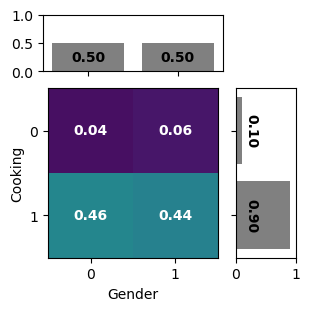

In [11]:
## Plot population distribution
homomul_viz.fig_2bin_comp_pop_frac(comp_pop_frac_tnsr)
plt.ylabel("Cooking")
plt.xlabel("Gender")
plt.show()

### Interaction preferences

#### One-dimensional homophily / heterophily matrices

In [12]:
## One-dimensional matrices of connection preference
h=0.9
h1 = np.array(
    [[h,1-h],
     [1-h,h]]
    )
h2 = np.array(
    [[h,1-h],
     [1-h,h]]
    )
h_mtrx_lst = np.array([h1,h2])

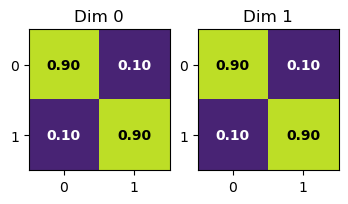

In [13]:
## Plot homophily / heterophily 1D matrices
plt.figure(figsize=(4,2))
ax = plt.subplot(1,2,1)
homomul_viz.fig_colored_matrix(
	h_mtrx_lst[0],
	ax=ax,
	xticks=[0,1],
	yticks=[0,1],
	show_colorbar=False,
	figsize=None,
	vmin=0,
	vmax=1
	)
plt.title("Dim 0")
ax = plt.subplot(1,2,2)
homomul_viz.fig_colored_matrix(
	h_mtrx_lst[1],
	ax=ax,
	xticks=[0,1],
	yticks=[0,1],
	show_colorbar=False,
	figsize=None,
	vmin=0,
	vmax=1
	)
plt.title("Dim 1")
plt.show()

#### Aggregation type

In [7]:
kind = "all"
## all -> Attempt connection in every dimension. All attempts must be successful.
## any -> Attempt connection in every dimension. At least one attempt must be successful.
## one -> Attempt connection in one random dimension. The probability of choosing each dimension is given by inpyt array p_d
## max -> Attempt connection in dimension with highest homophily with probability alpha. With probability 1-alpha, random dimension.
## min -> Attempt connection in dimension with lowest homophily with probability alpha. With probability 1-alpha, random dimension.

## Generate network

### Erdos-Renyi style

In [14]:
G_ER = homomul.am_v3(
            h_mtrx_lst,
            comp_pop_frac_tnsr,
            kind=kind,
            directed=True,
            pop_fracs_lst = pop_fracs_lst,
            N=N,
            v = 1, ## Verbosity
            ## Interaction-specific params
            alpha = None,
            p_d = None
            )

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.42it/s]


In [15]:
pprint(dict(G_ER.nodes(data=True)))

{0: {'attr': (1, 1)},
 1: {'attr': (1, 0)},
 2: {'attr': (1, 0)},
 3: {'attr': (1, 1)},
 4: {'attr': (1, 1)},
 5: {'attr': (1, 1)},
 6: {'attr': (1, 1)},
 7: {'attr': (1, 1)},
 8: {'attr': (1, 0)},
 9: {'attr': (1, 0)},
 10: {'attr': (0, 0)},
 11: {'attr': (1, 0)},
 12: {'attr': (1, 0)},
 13: {'attr': (1, 0)},
 14: {'attr': (0, 0)},
 15: {'attr': (1, 1)},
 16: {'attr': (1, 1)},
 17: {'attr': (1, 0)},
 18: {'attr': (1, 1)},
 19: {'attr': (1, 0)},
 20: {'attr': (1, 0)},
 21: {'attr': (1, 1)},
 22: {'attr': (1, 0)},
 23: {'attr': (1, 1)},
 24: {'attr': (1, 0)},
 25: {'attr': (1, 1)},
 26: {'attr': (1, 1)},
 27: {'attr': (1, 1)},
 28: {'attr': (0, 1)},
 29: {'attr': (1, 1)},
 30: {'attr': (1, 0)},
 31: {'attr': (1, 1)},
 32: {'attr': (1, 1)},
 33: {'attr': (1, 0)},
 34: {'attr': (1, 1)},
 35: {'attr': (1, 0)},
 36: {'attr': (1, 0)},
 37: {'attr': (1, 0)},
 38: {'attr': (1, 1)},
 39: {'attr': (1, 1)},
 40: {'attr': (1, 1)},
 41: {'attr': (1, 1)},
 42: {'attr': (1, 0)},
 43: {'attr': (0, 1)}

In [16]:
pprint(list(G_ER.edges()))

[(0, 0),
 (0, 1),
 (0, 3),
 (0, 5),
 (0, 16),
 (0, 21),
 (0, 23),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 29),
 (0, 31),
 (0, 32),
 (0, 34),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 44),
 (0, 46),
 (0, 47),
 (0, 53),
 (0, 54),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 65),
 (0, 72),
 (0, 75),
 (0, 81),
 (0, 84),
 (0, 85),
 (0, 87),
 (0, 91),
 (0, 92),
 (0, 96),
 (0, 98),
 (0, 99),
 (0, 100),
 (0, 102),
 (0, 103),
 (0, 104),
 (0, 105),
 (0, 110),
 (0, 111),
 (0, 113),
 (0, 117),
 (0, 118),
 (0, 120),
 (0, 129),
 (0, 130),
 (0, 133),
 (0, 137),
 (0, 140),
 (0, 141),
 (0, 149),
 (0, 151),
 (0, 152),
 (0, 154),
 (0, 156),
 (0, 157),
 (0, 163),
 (0, 166),
 (0, 173),
 (0, 186),
 (0, 187),
 (0, 188),
 (0, 191),
 (0, 193),
 (0, 194),
 (0, 195),
 (0, 199),
 (0, 201),
 (0, 204),
 (0, 205),
 (0, 206),
 (0, 208),
 (0, 209),
 (0, 214),
 (0, 217),
 (0, 218),
 (0, 221),
 (0, 224),
 (0, 225),
 (0, 227),
 (0, 228),
 (0, 231),
 (0, 235),
 (0, 236),
 (0, 237),
 (0, 238),
 (0, 239),
 (0, 241),
 (0, 246)

 (119, 631),
 (119, 633),
 (119, 636),
 (119, 637),
 (119, 643),
 (119, 645),
 (119, 646),
 (119, 650),
 (119, 654),
 (119, 656),
 (119, 657),
 (119, 659),
 (119, 664),
 (119, 668),
 (119, 671),
 (119, 673),
 (119, 675),
 (119, 676),
 (119, 679),
 (119, 680),
 (119, 681),
 (119, 682),
 (119, 685),
 (119, 687),
 (119, 690),
 (119, 695),
 (119, 696),
 (119, 698),
 (119, 699),
 (119, 702),
 (119, 703),
 (119, 704),
 (119, 705),
 (119, 706),
 (119, 707),
 (119, 708),
 (119, 709),
 (119, 711),
 (119, 718),
 (119, 719),
 (119, 721),
 (119, 723),
 (119, 724),
 (119, 726),
 (119, 727),
 (119, 728),
 (119, 733),
 (119, 735),
 (119, 738),
 (119, 739),
 (119, 740),
 (119, 742),
 (119, 743),
 (119, 748),
 (119, 749),
 (119, 752),
 (119, 753),
 (119, 754),
 (119, 758),
 (119, 760),
 (119, 761),
 (119, 763),
 (119, 764),
 (119, 766),
 (119, 768),
 (119, 770),
 (119, 774),
 (119, 776),
 (119, 777),
 (119, 780),
 (119, 782),
 (119, 783),
 (119, 784),
 (119, 786),
 (119, 787),
 (119, 791),
 (119, 792),

 (234, 459),
 (234, 462),
 (234, 465),
 (234, 467),
 (234, 469),
 (234, 472),
 (234, 473),
 (234, 474),
 (234, 476),
 (234, 482),
 (234, 483),
 (234, 487),
 (234, 491),
 (234, 496),
 (234, 497),
 (234, 499),
 (234, 500),
 (234, 506),
 (234, 508),
 (234, 511),
 (234, 512),
 (234, 515),
 (234, 516),
 (234, 518),
 (234, 523),
 (234, 524),
 (234, 525),
 (234, 526),
 (234, 527),
 (234, 528),
 (234, 529),
 (234, 537),
 (234, 538),
 (234, 542),
 (234, 543),
 (234, 545),
 (234, 549),
 (234, 550),
 (234, 554),
 (234, 555),
 (234, 557),
 (234, 561),
 (234, 563),
 (234, 564),
 (234, 566),
 (234, 568),
 (234, 570),
 (234, 571),
 (234, 574),
 (234, 578),
 (234, 580),
 (234, 582),
 (234, 583),
 (234, 584),
 (234, 590),
 (234, 592),
 (234, 593),
 (234, 596),
 (234, 602),
 (234, 603),
 (234, 608),
 (234, 609),
 (234, 619),
 (234, 621),
 (234, 628),
 (234, 632),
 (234, 634),
 (234, 636),
 (234, 638),
 (234, 639),
 (234, 640),
 (234, 641),
 (234, 642),
 (234, 643),
 (234, 644),
 (234, 647),
 (234, 651),

 (346, 981),
 (346, 983),
 (346, 986),
 (346, 991),
 (346, 992),
 (346, 995),
 (346, 996),
 (346, 997),
 (346, 998),
 (347, 8),
 (347, 9),
 (347, 11),
 (347, 12),
 (347, 13),
 (347, 17),
 (347, 19),
 (347, 22),
 (347, 24),
 (347, 30),
 (347, 31),
 (347, 32),
 (347, 33),
 (347, 35),
 (347, 36),
 (347, 37),
 (347, 42),
 (347, 44),
 (347, 52),
 (347, 53),
 (347, 56),
 (347, 69),
 (347, 70),
 (347, 71),
 (347, 73),
 (347, 74),
 (347, 76),
 (347, 77),
 (347, 80),
 (347, 82),
 (347, 86),
 (347, 89),
 (347, 93),
 (347, 94),
 (347, 95),
 (347, 97),
 (347, 100),
 (347, 101),
 (347, 106),
 (347, 107),
 (347, 108),
 (347, 112),
 (347, 114),
 (347, 115),
 (347, 116),
 (347, 117),
 (347, 119),
 (347, 123),
 (347, 124),
 (347, 125),
 (347, 127),
 (347, 128),
 (347, 130),
 (347, 136),
 (347, 139),
 (347, 140),
 (347, 144),
 (347, 146),
 (347, 147),
 (347, 150),
 (347, 154),
 (347, 155),
 (347, 158),
 (347, 160),
 (347, 162),
 (347, 164),
 (347, 165),
 (347, 166),
 (347, 167),
 (347, 169),
 (347, 170)

 (447, 884),
 (447, 886),
 (447, 894),
 (447, 895),
 (447, 906),
 (447, 912),
 (447, 913),
 (447, 914),
 (447, 915),
 (447, 919),
 (447, 922),
 (447, 924),
 (447, 927),
 (447, 931),
 (447, 935),
 (447, 936),
 (447, 937),
 (447, 939),
 (447, 940),
 (447, 942),
 (447, 945),
 (447, 946),
 (447, 947),
 (447, 952),
 (447, 954),
 (447, 961),
 (447, 963),
 (447, 969),
 (447, 970),
 (447, 971),
 (447, 972),
 (447, 973),
 (447, 975),
 (447, 977),
 (447, 979),
 (447, 981),
 (447, 983),
 (447, 985),
 (447, 986),
 (447, 992),
 (447, 999),
 (448, 0),
 (448, 1),
 (448, 3),
 (448, 4),
 (448, 6),
 (448, 13),
 (448, 15),
 (448, 16),
 (448, 18),
 (448, 21),
 (448, 23),
 (448, 24),
 (448, 26),
 (448, 27),
 (448, 29),
 (448, 31),
 (448, 32),
 (448, 34),
 (448, 38),
 (448, 39),
 (448, 40),
 (448, 41),
 (448, 44),
 (448, 45),
 (448, 46),
 (448, 47),
 (448, 50),
 (448, 52),
 (448, 53),
 (448, 54),
 (448, 59),
 (448, 60),
 (448, 61),
 (448, 62),
 (448, 63),
 (448, 64),
 (448, 65),
 (448, 66),
 (448, 68),
 (44

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [44]:
## Export the network in gexf format to visualize it with gephi: https://gephi.org/
G_out = homomul.G_attr_to_str(G_ER,"attr")
nx.write_gexf(G_out, "../partial_results/tests/ER_nw.gexf")